# Campaña "Seguro Vivienda" de compañía financiera

Los correos a todos los potenciales clientes de un producto no son una estrategia de marketing efectiva, ya que muchos de ellos no están interesados. Identificando a los más propensos a contratar el producto se podría dirigir la campaña de marketing con mayor precisión y reducir su coste.

La compañía financiera ofrece seguros, créditos, etc. y nos proporciona un listado de clientes a los que ha dirigido una campaña de marketing ofreciendo el nuevo producto “Seguro Vivienda”. En el fichero se encuentran los datos de dichos clientes, así como información de otros productos ya contratados y si contrataron el nuevo producto o no. También se dispone de un fichero con información sociodemográfica asociada a diferentes zonas de residencia.

Se pide que planifiquemos una campaña más efectiva sobre un segundo conjunto de clientes, para lo que utilizaremos el primer conjunto para construir modelos predictivos que usaremos sobre el segundo conjunto para seleccionar los clientes más propensos a contratar el producto. Una vez seleccionados los candidatos, la compañía les ofrecerá el producto y medirá la eficacia del modelo según la proporción de ellos que lo contratan.

## Conjuntos de datos
### Clientes
* ID_Cliente: identificador único del cliente
* Fecha_Nacimiento: fecha de nacimiento del cliente
* Fecha_Alta: fecha de alta del cliente
* Sexo: sexo del cliente
* ID_Zona: identificador único de zona de residencia
* Productos_X: número de productos contratados por tipo
* Gasto_X: gasto anual en los distintos productos
* Seguro_Vivienda: el cliente contrató el producto ofrecido o no

### Zonas
* ID_Zona: identificador único de zona
* Tipo_X: porcentaje de población por tipología familiar
* Educacion_X: porcentaje de población por nivel de estudios
* Poblacion_X: porcentaje de población por tipo de población
* Vivienda_X: porcentaje de población por tipo de vivienda
* Medico_X: porcentaje de población por tipo de seguro médico
* Ingresos_X: porcentaje de población por nivel de ingresos

## Cruce de datos

Primero vamos a cruzar los datos de clientes con los datos de zonas, para tener toda la información en una sola tabla por cada cliente. En el siguiente código, deberás introducir en la variable 'datos_path' la ruta a la carpeta donde se encuentran los ficheros de datos, por ejemplo "~/Escritorio" si están en el escritorio.

In [1]:
#Complete your code
datos_path="."

A continuación leemos los ficheros y los guardamos en su correspondiente dataframe.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame

import os

%matplotlib inline

clientes_file = "Clientes_train.csv"
zonas_file = "Zonas.csv"

clientes = pd.read_csv(os.path.join(datos_path, clientes_file), sep='\t')
zonas = pd.read_csv(os.path.join(datos_path, zonas_file), sep='\t')

datos = pd.merge(clientes, zonas, on="ID_Zona", how="inner")

targets = datos["Seguro_Vivienda"]
variables = datos.drop(["Seguro_Vivienda"], axis=1, inplace=False)

## Estudio de datos

Hacemos un estudio de los datos con el objetivo de comprenderlos y encontrar en ellos posibles anomalías. Empezamos por una inspección visual de una muestra de filas de la tabla para ver la estructura de los datos:

In [3]:
#Complete your code
clientes

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Seguro_Vivienda
0,C3088,29/03/1968,27/03/1989,Mujer,Z1143,0,1,0,0.00,617.55,0.00,False
1,C2975,08/12/1978,26/12/1998,Mujer,Z1201,2,0,1,973.61,0.00,386.87,False
2,C0840,31/07/1950,19/04/1972,Hombre,Z1122,0,1,2,0.00,3572.01,273.15,False
3,C0461,29/07/1945,21/07/1967,Mujer,Z1190,1,1,2,87.91,4558.71,521.66,False
4,C2777,17/10/1955,22/02/1976,Hombre,Z1344,0,1,0,0.00,4289.61,0.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2994,C1524,02/11/1961,30/08/1982,Hombre,Z1593,0,1,2,0.00,6712.11,82.93,True
2995,C3670,18/09/1953,15/03/1975,Hombre,Z1023,0,1,1,0.00,1653.89,36.73,False
2996,C0919,15/11/1950,27/12/1971,Hombre,Z0421,0,3,1,0.00,3704.71,89.90,False
2997,C0235,12/08/1970,23/01/1991,Hombre,Z1070,0,0,2,0.00,0.00,242.76,False


In [4]:
#Complete your code
zonas

,ID_Zona,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,Educacion_Media,Educacion_Baja,Poblacion_Empresario,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
0,Z0000,16.66,25.17,58.17,0.00,80.08,19.92,0.00,0.00,0.00,100.00,0.00,100.00,16.96,83.04,0.00,0.00,100.00
1,Z0002,54.13,45.87,0.00,40.72,43.42,15.86,70.45,29.55,0.00,0.00,83.52,16.48,78.07,21.93,0.00,55.10,44.90
2,Z0006,57.29,42.71,0.00,31.15,68.85,0.00,31.51,68.49,0.00,0.00,100.00,0.00,31.89,68.11,0.00,0.00,100.00
3,Z0007,56.37,14.73,28.91,20.01,40.77,39.21,25.79,22.76,33.59,17.86,0.00,100.00,0.00,100.00,0.00,0.00,100.00
4,Z0009,100.00,0.00,0.00,100.00,0.00,0.00,100.00,0.00,0.00,0.00,100.00,0.00,100.00,0.00,33.01,33.30,33.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,Z1833,29.80,40.49,29.71,37.11,22.43,40.46,40.19,45.32,14.48,0.00,79.21,20.79,31.49,68.51,7.78,6.40,85.83
1200,Z1836,18.03,51.77,30.21,25.37,41.11,33.52,14.73,19.65,0.00,65.62,79.06,20.94,12.54,87.46,17.82,2.27,79.92
1201,Z1838,45.38,54.62,0.00,0.00,47.89,52.11,19.37,18.51,31.21,30.91,95.92,4.08,22.55,77.45,0.00,7.95,92.05
1202,Z1841,100.00,0.00,0.00,46.14,53.86,0.00,100.00,0.00,0.00,0.00,100.00,0.00,72.90,27.10,0.00,100.00,0.00


Seguimos con un estudio de estadísticos básicos que nos indiquen el rango de valores de cada variable (columna) numérica:

In [5]:
#Complete your code
rangos_maximos_clientes = clientes.select_dtypes(include='number').max()
rangos_minimos_clientes = clientes.select_dtypes(include='number').min()
rangos_diferencia_clientes = rangos_maximos_clientes - rangos_minimos_clientes

# Crear DataFrame con las tres columnas
rangos_df_clientes = pd.DataFrame({
    'minimo': rangos_minimos_clientes,
    'maximo': rangos_maximos_clientes,
    'diferencia': rangos_diferencia_clientes
})

rangos_df_clientes


,minimo,maximo,diferencia
Productos_Vida,0.0,4.00,4.00
Productos_Vehiculos,0.0,10.00,10.00
Productos_Otros,0.0,7.00,7.00
Gasto_Vida,0.0,4934.59,4934.59
Gasto_Vehiculos,0.0,16735.67,16735.67
Gasto_Otros,0.0,17188.62,17188.62


In [6]:
#Complete your code
rangos_maximos_zonas = zonas.select_dtypes(include='number').max()
rangos_minimos_zonas = zonas.select_dtypes(include='number').min()
rangos_diferencia_zonas = rangos_maximos_zonas - rangos_minimos_zonas

# Crear DataFrame con las tres columnas
rangos_df_zonas = pd.DataFrame({
    'minimo': rangos_minimos_zonas,
    'maximo': rangos_maximos_zonas,
    'diferencia': rangos_diferencia_zonas
})

rangos_df_zonas


,minimo,maximo,diferencia
Tipo_Familia,0.0,100.00,100.00
Tipo_Pareja,0.0,100.00,100.00
Tipo_Soltero,0.0,100.00,100.00
Educacion_Superior,0.0,100.00,100.00
Educacion_Media,0.0,100.00,100.00
Educacion_Baja,0.0,100.00,100.00
Poblacion_Empresario,0.0,100.00,100.00
Poblacion_Funcionario,0.0,100.00,100.00
Poblacion_Trabajador_Cualificado,0.0,100.00,100.00
Poblacion_Trabajador_No_Cualificado,0.0,100.00,100.00


Grafique el histograma de la variable "Gasto_Vehiculos" del dataframe datos

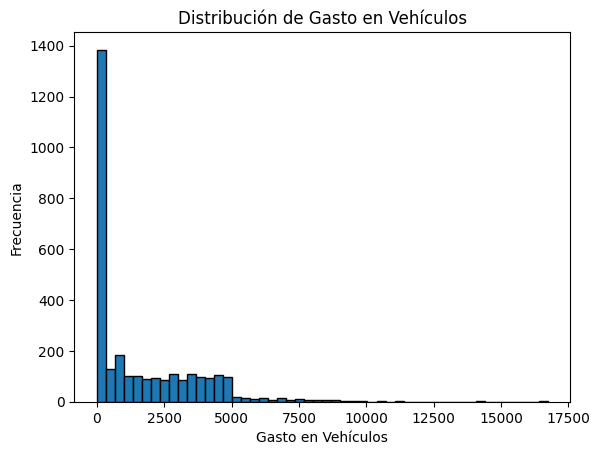

In [7]:
plt.hist(clientes["Gasto_Vehiculos"], bins=50, edgecolor='black')
plt.xlabel('Gasto en Vehículos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Gasto en Vehículos')
plt.show()


Y, también, un boxplot de la misma.

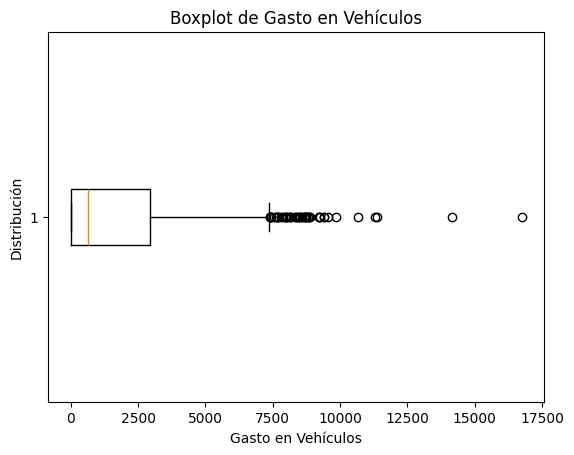

In [8]:

plt.boxplot(clientes["Gasto_Vehiculos"], vert=False)
plt.xlabel('Gasto en Vehículos')
plt.ylabel('Distribución')
plt.title('Boxplot de Gasto en Vehículos')
plt.show()

También podemos obtener información de variables categóricas. En este caso, imprima por pantalla el conteo del número de muestras que se tengan por sexo  del dataframe variables y grafique un diagrama de barras por sexo.

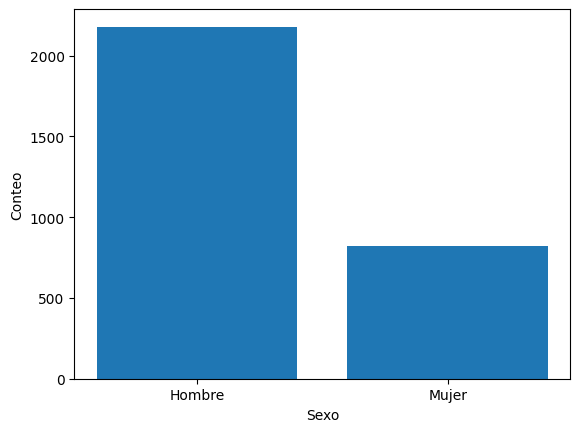

In [9]:
sexo_count :Series[int] = clientes["Sexo"].value_counts()

plt.bar(sexo_count.index, sexo_count.values)
plt.xlabel('Sexo')
plt.ylabel("Conteo")
plt.draw()

## Selección de variables

Hay diversos métodos que nos permiten identificar las mejores variables para resolver nuestro problema. Scikit permite identificar las mejores variables según diversos tests estadísticos, aunque para algunos de ellos debemos utilizar sólo las variables numéricas:

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2 = SelectKBest(chi2, k=10).fit(variables._get_numeric_data(), targets)
for (col, sel) in zip(variables._get_numeric_data().columns.values, chi2.get_support()):
    if sel:
        print(col)
seleccion = chi2.transform(variables._get_numeric_data())

columnas_seleccionadas = variables._get_numeric_data().columns[chi2.get_support()].values
seleccion_frame = DataFrame(seleccion, columns=columnas_seleccionadas)
seleccion_frame.head()



Gasto_Vida
Gasto_Vehiculos
Gasto_Otros
Educacion_Superior
Educacion_Baja
Poblacion_Empresario
Poblacion_Trabajador_No_Cualificado
Vivienda_Propiedad
Vivienda_Alquiler
Medico_Seguro_Privado


,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Educacion_Superior,Educacion_Baja,Poblacion_Empresario,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado
0,0.00,617.55,0.00,2.75,58.05,23.70,27.13,71.34,28.66,32.77
1,973.61,0.00,386.87,40.84,18.04,37.53,9.42,92.04,7.96,43.84
2,0.00,3572.01,273.15,7.63,64.01,5.50,41.43,56.37,43.63,17.48
3,87.91,4558.71,521.66,21.17,21.87,19.05,1.54,93.38,6.62,44.57
4,0.00,4289.61,0.00,26.98,20.40,32.17,12.61,12.63,87.37,45.32


Veamos cómo queda representada una muestra del dataset respecto de las dos mejores variables:

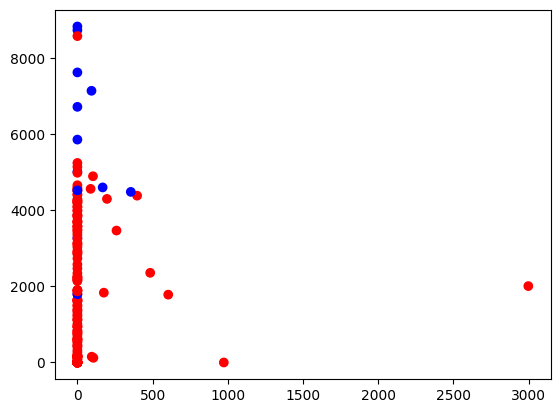

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(seleccion[1:200, 0], seleccion[1:200, 1], c=targets[1:200], cmap=cm_bright)
plt.show()

Se puede ver cómo al representar las muestras respecto de estas dos variables, los casos de clientes que han contratado el producto se distinguen más fácilmente, ya que tienden a tener un valor alto en una de ellas (puntos azules). Por tanto, estas variables parecen ser buenas a la hora de distinguir casos positivos y negativos.

Cuando el proceso de modelización es costoso, reducir el número de variables puede ser de gran ayuda. Las técnicas de selección de variables se usan ampliamente en los procesos de análisis de datos y modelización. Veremos algunas técnicas en clase.

## Transformación de variables

Es posible también realizar una transformación de variables, obteniendo combinaciones, normalmente lineales, de las variables originales que nos den mejores resultados al introducirlas en los modelos predictivos. SVD, PCA o ICA son algunos ejemplos:

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(variables._get_numeric_data())
print(pca.components_)
print(pca.explained_variance_ratio_)
transformacion = pca.transform(variables._get_numeric_data())

[[ 1.13272484e-05  2.49947982e-04  7.73521138e-05  3.07643903e-03
   9.98926227e-01  4.61104027e-02  4.83515690e-04  9.64832896e-05
  -5.79992186e-04  4.74753804e-04 -3.82916687e-05 -4.36431988e-04
   7.76395166e-04 -1.67202699e-04 -4.09448513e-04 -1.99807434e-04
   1.92596102e-03 -1.92596102e-03  8.38968477e-04 -8.38968477e-04
   1.45851838e-06  1.21989814e-04 -1.23418552e-04]
 [ 2.29104271e-05  9.00357437e-05  4.87987707e-04  1.41580431e-02
  -4.61751332e-02  9.98791715e-01  5.98078053e-05  7.42107667e-04
  -8.02017454e-04 -3.99451289e-04  1.67935439e-04  2.31606373e-04
   1.51812400e-03 -1.35632862e-03 -8.08457612e-04  6.46470913e-04
   5.99488232e-03 -5.99488232e-03  1.36589999e-03 -1.36589999e-03
  -3.22428480e-05 -3.69649764e-05  6.92457105e-05]
 [ 5.40217286e-04 -2.46878994e-05  1.66385989e-04  9.99876166e-01
  -2.43492037e-03 -1.43238167e-02  2.16244726e-03 -2.04578733e-05
  -2.14247137e-03  4.83553780e-04  1.64118780e-03 -2.12421051e-03
   9.03270170e-04  5.64289594e-04 -6.954

Veamos cómo queda representada una muestra del dataset respecto de las dos mejores variables sintéticas:

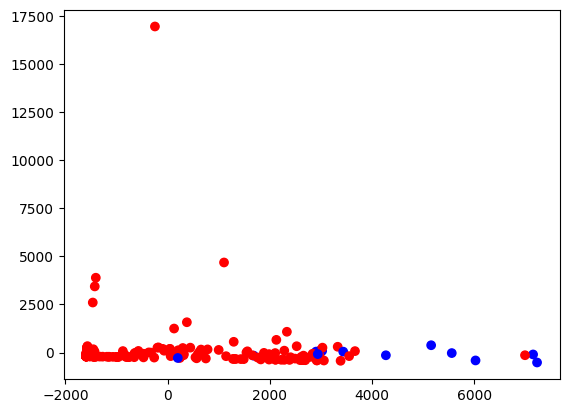

In [16]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(transformacion[1:200, 0], transformacion[1:200, 1], c=targets[1:200], cmap=cm_bright)
plt.show()

Como en el caso anterior, se puede ver que los casos positivos se pueden separar más fácilmente de los negativos al quedar la mayoría de ellos a la derecha de la gráfica.

Es habitual que las variables sintéticas generadas con métodos como PCA sean incluso mejores que las mejores variables seleccionadas con otras técnicas. Como contrapartida, el cálculo de estas variables es costoso y suele ser difícil darles un sentido de negocio.

¿Podrías probar varias técnicas de selección y transformación de variables? Ten en cuenta que no sólo es importante lo buenas que sean las variables finales para la predicción, sino también que el coste de calcularlas sea razonable y que seas capaz de explicar y justificar estas variables en caso de que el cliente lo solicite.

* http://scikit-learn.org/stable/modules/feature_selection.html
* http://scikit-learn.org/stable/modules/decomposition.html

In [21]:
from sklearn.decomposition import PCA

pcaSvd = PCA(n_components=10,svd_solver='randomized')
pcaSvd.fit(variables._get_numeric_data())
print(pcaSvd.components_)
print(pcaSvd.explained_variance_ratio_)
transformacion_svd = pcaSvd.transform(variables._get_numeric_data())

[[ 1.13272484e-05  2.49947982e-04  7.73521138e-05  3.07643903e-03
   9.98926227e-01  4.61104027e-02  4.83515690e-04  9.64832896e-05
  -5.79992186e-04  4.74753804e-04 -3.82916687e-05 -4.36431988e-04
   7.76395166e-04 -1.67202699e-04 -4.09448513e-04 -1.99807434e-04
   1.92596102e-03 -1.92596102e-03  8.38968477e-04 -8.38968477e-04
   1.45851838e-06  1.21989814e-04 -1.23418552e-04]
 [ 2.29104271e-05  9.00357437e-05  4.87987707e-04  1.41580431e-02
  -4.61751332e-02  9.98791715e-01  5.98078053e-05  7.42107667e-04
  -8.02017454e-04 -3.99451289e-04  1.67935439e-04  2.31606373e-04
   1.51812400e-03 -1.35632862e-03 -8.08457612e-04  6.46470913e-04
   5.99488232e-03 -5.99488232e-03  1.36589999e-03 -1.36589999e-03
  -3.22428480e-05 -3.69649764e-05  6.92457105e-05]
 [ 5.40217286e-04 -2.46878994e-05  1.66385989e-04  9.99876166e-01
  -2.43492037e-03 -1.43238167e-02  2.16244726e-03 -2.04578733e-05
  -2.14247137e-03  4.83553780e-04  1.64118780e-03 -2.12421051e-03
   9.03270170e-04  5.64289594e-04 -6.954

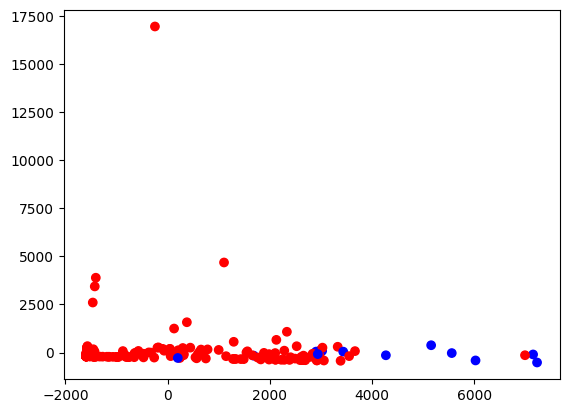

In [22]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(transformacion_svd[1:200, 0], transformacion_svd[1:200, 1], c=targets[1:200], cmap=cm_bright)
plt.show()

## Entrenamiento del modelo

No es evidente cuál es el mejor tipo de modelo para resolver nuestro problema. Por lo tanto, empezaremos con los modelos más sencillos y estables, los modelos lineales. Si los resultados no son suficientemente buenos, probaremos modelos más complejos.

Utilizaremos las variables originales, seleccionadas o transformadas y estudiaremos medidas de calidad como la precisión y el "recall" para evaluar cada uno de los modelos. Para ello, dividiremos el conjunto de datos de entrenamiento de modo que los primeros 2000 patrones servirán para entrenar los modelos, y el resto para validar:

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(transformacion, targets, test_size=0.3, shuffle=True, random_state=42)

# 2048
#print(len(X_train))

El primer modelo a probar serán la regresión logística:

In [58]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(max_iter=100)
modelo.fit(X_train,y_train)

c:\source\uem\uem.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [59]:
# Validacion de datos 
print(f"Train:   {modelo.score(X_train, y_train):.2%}")
print(f"Val: {modelo.score(X_val, y_val):.2%}")

Train:   95.21%
Val: 94.65%


Vemos que los modelos lineales tienden a clasificar los patrones de la clase minoritaria como pertenecientes a la clase mayoritaria, por lo que vamos a probar con modelos también sencillos pero no lineales, como árboles de decisión, con la esperanza de obtener mejores resultados:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(max_depth=5, random_state=42)
arbol.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [64]:
# Validacion de datos 
print(f"Train:   {arbol.score(X_train, y_train):.2%}")
print(f"Val: {arbol.score(X_val, y_val):.2%}")

Train:   96.92%
Val: 95.11%


Elegir qué modelo utilizar y ajustarlo no es una tarea fácil. Habitualmente se prueban modelos sencillos y se va subiendo en complejidad si los resultados no son todo lo buenos que nos gustaría. La búsqueda de meta-parámetros es un proceso complejo que habitualmente necesita de cierta experiencia y conocimiento de los modelos.

Intenta mejorar los resultados vistos hasta ahora eligiendo alguno de los modelos e intentando ajustar sus meta-parámetros. Puedes probar a combinar técnicas de selección o transformación de variables con los modelos predictivos, con la ayuda de los pipelines de Scikit-learn.

* http://scikit-learn.org/stable/modules/linear_model.html
* http://scikit-learn.org/stable/modules/neural_network.html
* http://scikit-learn.org/stable/modules/tree.html
* http://scikit-learn.org/stable/modules/svm.html
* http://en.wikipedia.org/wiki/Precision_and_recall

## Evaluación del modelo

Ya vimos en el apartado anterior algunos indicadores de la calidad del modelo. También podemos utilizar gráficas como la curva precisión-recall o la curva ROC:

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

precision, recall, thresholds = precision_recall_curve(y_val, logr.predict(X_val))
pr_auc = auc(precision, recall)
plt.figure()
plt.plot(precision, recall, label='Precision-recall curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, thresholds = roc_curve(y_val, logr.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Es muy habitual utilizar estas gráficas, especialmente la curva ROC, para decidir si los resultados son satisfactorios. Cuanto mayor sea el área que queda bajo la curva, mejores son los resultados del modelo que estamos probando.

Utiliza gráficas (estas u otras que puedas encontrar útiles) para hacer una valoración final de los resultados. Razona las conclusiones.

* http://scikit-learn.org/stable/modules/model_evaluation.html
* http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics